In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import altair as alt

# This file is used to explore our data sets and test certain trends through visuiliations.

In [4]:
twitch_vs_game_data_df = pd.read_csv('Resources/merge_output.csv')
twitch_vs_game_data_df.head()

,title,avg_hours_watched,avg_hours_streamed,avg_streamers,avg_viewers,avg_channels,app_id,release_date,reviews_total,review_avg_percent,launch_price_cents,dataset_est_rev_cents
0,.hack//G.U. Last Recode,145350,35258,3174,202,49,525480,2017-11-03,2689,87.0,4999,13442311
1,20 Minutes Till Dawn,911356,12253,3616,1267,17,1966900,2023-06-08,20942,92.0,499,10450058
2,60 Parsecs!,529688,1867,606,736,2,646270,2018-09-18,2315,89.0,999,2312685
3,60 Seconds!,314900,1023,420,424,0,368360,2015-05-25,9979,84.0,899,8971121
4,7 Days to Die,1023033,89486,8880,1397,122,251570,2013-12-13,185945,88.0,2499,464676555


In [5]:
twitch_vs_game_data_df['avg_hours_watched'].sort_values()

340       93954
290       95776
708       99303
120       99531
562      100594
         ...   
233    28608284
198    42350161
128    48489362
127    53172684
302    64115728
Name: avg_hours_watched, Length: 862, dtype: int64

7| twitch data for engagement and product promotion | Ryan MadO
8| twitch viewer count to review count correlation x=review_count y=viewer_count size=revenue | Ryan MadO
9| twitch viewer count by tag/genre. interactible, select from top 30-50(?) tags |  Ryan MadO

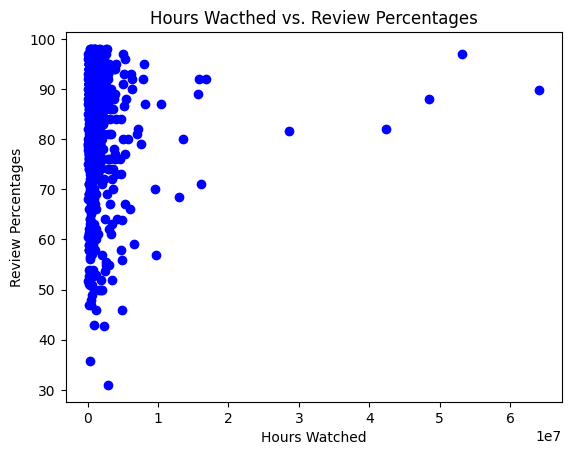

In [6]:
# Plot a scatter plot for 'hour_watched'
plt.scatter(twitch_vs_game_data_df['avg_hours_watched'], twitch_vs_game_data_df['review_avg_percent'], color='blue')
plt.title('Hours Wacthed vs. Review Percentages')
plt.xlabel('Hours Watched')
plt.ylabel('Review Percentages')

# Show the plot
plt.show()

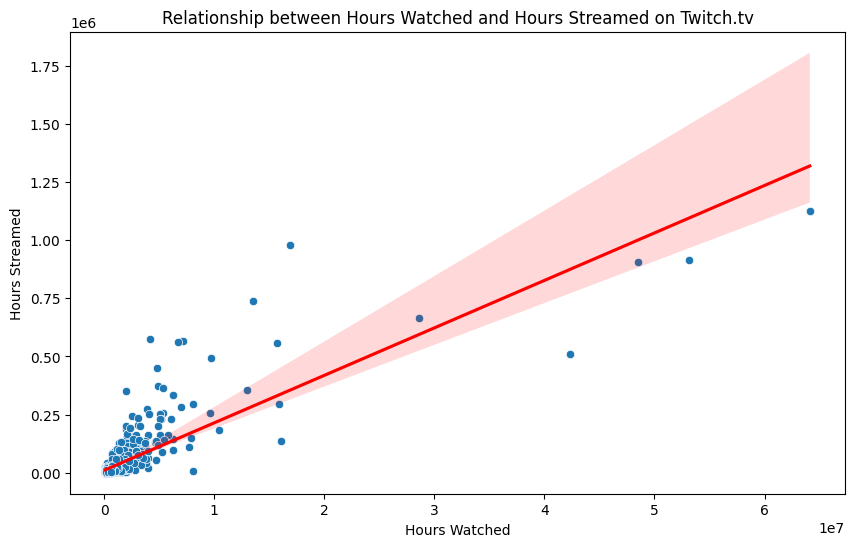

In [7]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_hours_watched', y='avg_hours_streamed', data=twitch_vs_game_data_df)
sns.regplot(x='avg_hours_watched', y='avg_hours_streamed', data=twitch_vs_game_data_df, scatter=False, color='red') # Adds a trend line

plt.title('Relationship between Hours Watched and Hours Streamed on Twitch.tv')
plt.xlabel('Hours Watched')
plt.ylabel('Hours Streamed')
plt.show()

In [8]:
twitch_vs_game_data_df['avg_hours_watched'].value_counts(bins= 10)

(29932.225, 6496131.4]      841
(6496131.4, 12898308.8]      10
(12898308.8, 19300486.2]      6
(25702663.6, 32104841.0]      1
(44909195.8, 51311373.2]      1
(38507018.4, 44909195.8]      1
(51311373.2, 57713550.6]      1
(57713550.6, 64115728.0]      1
(32104841.0, 38507018.4]      0
(19300486.2, 25702663.6]      0
Name: count, dtype: int64

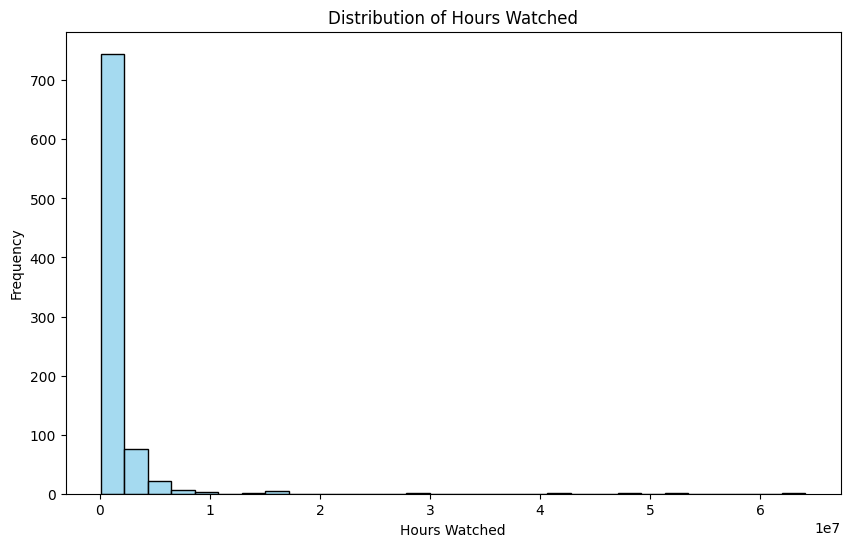

In [9]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(twitch_vs_game_data_df['avg_hours_watched'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Hours Watched')
plt.xlabel('Hours Watched')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Sort 'avg_hours_watched' from highest to lowest values
twitch_vs_game_data_df = twitch_vs_game_data_df.sort_values(by='avg_hours_watched', ascending=False)
twitch_vs_game_data_df.head(50)

,title,avg_hours_watched,avg_hours_streamed,avg_streamers,avg_viewers,avg_channels,app_id,release_date,reviews_total,review_avg_percent,launch_price_cents,dataset_est_rev_cents
302,Grand Theft Auto V,64115728,1123643,126038,87926,1539,271590,2015-04-13,1322782,89.85,2999,3967023218
127,Counter-Strike,53172684,913781,141632,72571,1248,10,2000-11-01,137421,97.00,999,137283579
128,Counter-Strike: Global Offensive,48489362,906847,123006,66604,1243,730,2012-08-21,7382695,88.00,1499,11066659805
198,Dota 2,42350161,509145,36145,58036,697,570,2013-07-09,2017009,82.00,2999,6049009991
233,FIFA 22,28608284,665236,123516,39228,911,1506830,2021-09-30,92689,81.71,5999,556041311
343,Hogwarts Legacy,16842526,978880,121568,24875,1423,990080,2023-02-10,153204,92.00,5999,919070796
497,Only Up!,16039966,134777,42445,22078,183,2381590,2023-05-24,10392,71.00,799,8303208
36,Among Us,15849833,296428,68944,21747,406,945360,2018-11-16,585788,92.00,499,292308212
59,Baldur's Gate 3,15671913,556982,43456,21198,758,1086940,2020-10-06,63044,89.00,5999,378200956
163,Dead by Daylight,13545274,738369,68595,18559,1011,381210,2016-06-14,486959,80.00,1999,973431041


In [11]:
# Create a DataFrame with the top 10 highest 'avg_hours_watched' values
top_10_df = twitch_vs_game_data_df.nlargest(10, 'avg_hours_watched')
top_10_df.head(10)

,title,avg_hours_watched,avg_hours_streamed,avg_streamers,avg_viewers,avg_channels,app_id,release_date,reviews_total,review_avg_percent,launch_price_cents,dataset_est_rev_cents
302,Grand Theft Auto V,64115728,1123643,126038,87926,1539,271590,2015-04-13,1322782,89.85,2999,3967023218
127,Counter-Strike,53172684,913781,141632,72571,1248,10,2000-11-01,137421,97.00,999,137283579
128,Counter-Strike: Global Offensive,48489362,906847,123006,66604,1243,730,2012-08-21,7382695,88.00,1499,11066659805
198,Dota 2,42350161,509145,36145,58036,697,570,2013-07-09,2017009,82.00,2999,6049009991
233,FIFA 22,28608284,665236,123516,39228,911,1506830,2021-09-30,92689,81.71,5999,556041311
343,Hogwarts Legacy,16842526,978880,121568,24875,1423,990080,2023-02-10,153204,92.00,5999,919070796
497,Only Up!,16039966,134777,42445,22078,183,2381590,2023-05-24,10392,71.00,799,8303208
36,Among Us,15849833,296428,68944,21747,406,945360,2018-11-16,585788,92.00,499,292308212
59,Baldur's Gate 3,15671913,556982,43456,21198,758,1086940,2020-10-06,63044,89.00,5999,378200956
163,Dead by Daylight,13545274,738369,68595,18559,1011,381210,2016-06-14,486959,80.00,1999,973431041


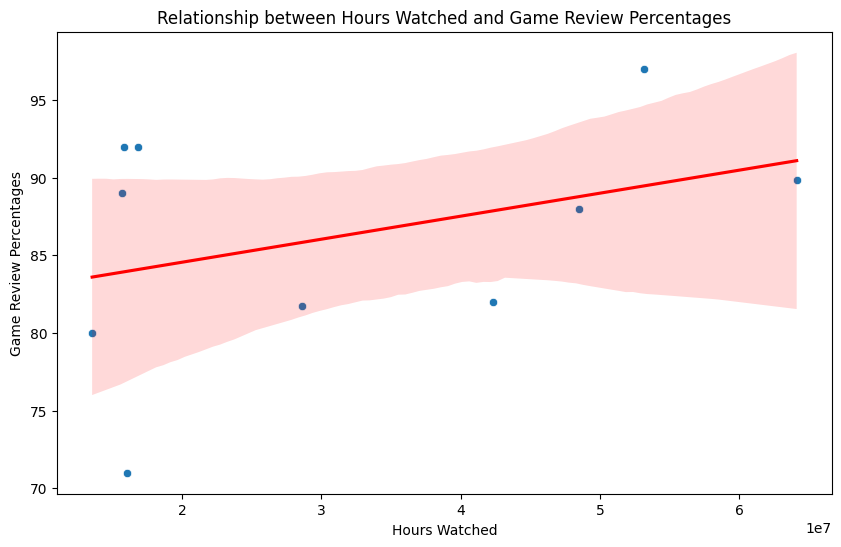

In [12]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_hours_watched', y='review_avg_percent', data=top_10_df)
sns.regplot(x='avg_hours_watched', y='review_avg_percent', data=top_10_df, scatter=False, color='red')  # Adds a trend line

plt.title('Relationship between Hours Watched and Game Review Percentages')
plt.xlabel('Hours Watched')
plt.ylabel('Game Review Percentages')
plt.show()

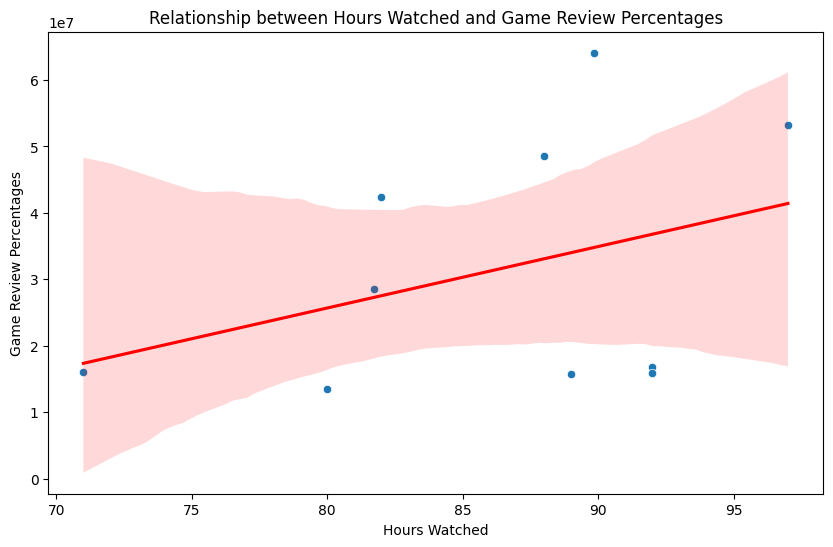

In [13]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_avg_percent', y='avg_hours_watched', data=top_10_df)
sns.regplot(x='review_avg_percent', y='avg_hours_watched', data=top_10_df, scatter=False, color='red')  # Adds a trend line

plt.title('Relationship between Hours Watched and Game Review Percentages')
plt.xlabel('Hours Watched')
plt.ylabel('Game Review Percentages')
plt.show()

In [14]:
top_10_reviews_df = twitch_vs_game_data_df.nlargest(50, 'review_avg_percent')
top_10_reviews_df.head(50)

,title,avg_hours_watched,avg_hours_streamed,avg_streamers,avg_viewers,avg_channels,app_id,release_date,reviews_total,review_avg_percent,launch_price_cents,dataset_est_rev_cents
795,Vampire Survivors,2715286,41655,11538,3796,57,1794680,2022-10-20,191904,98.0,499,95760096
319,Half-Life: Alyx,2631169,43547,8169,3552,58,546560,2020-03-23,70666,98.0,5999,423925334
316,Hades,1721582,74640,11508,2353,101,1145360,2020-09-17,212427,98.0,2499,530855073
129,Crab Champions,1660800,37349,8423,2309,51,774801,2023-04-01,11136,98.0,999,11124864
649,Stardew Valley,1071113,82756,13330,1467,113,413150,2016-02-26,495433,98.0,1499,742654067
589,RimWorld,1064438,28659,2560,1457,38,294100,2018-10-17,138460,98.0,3499,484471540
772,Trombone Champ,931016,6677,3962,1294,9,1059990,2022-09-15,6637,98.0,1499,9948863
585,Rhythm Doctor,877177,8941,2906,1180,12,774181,2021-02-26,16387,98.0,1599,26202813
384,Katana ZERO,665019,10328,2607,924,14,460950,2019-04-18,52203,98.0,1499,78252297
760,Totally Accurate Battle Simulator,503213,4394,2233,693,5,508440,2021-04-01,102100,98.0,1999,204097900


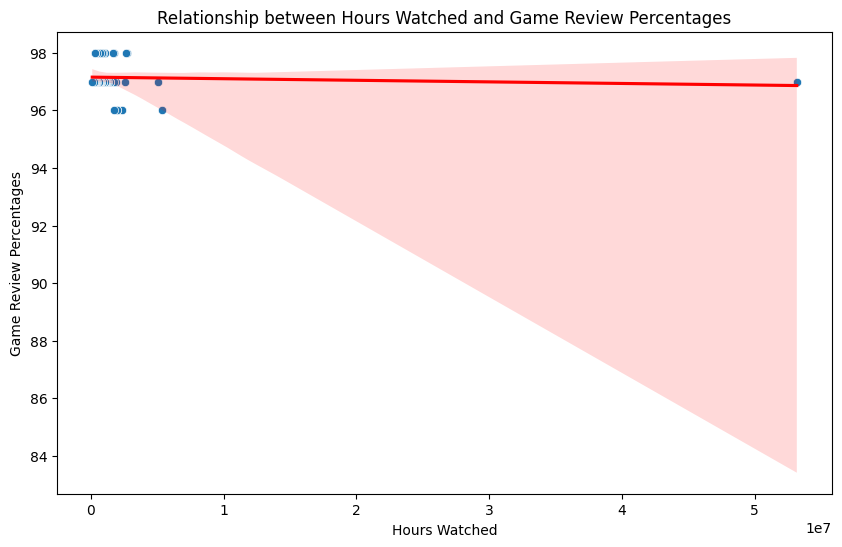

In [15]:
# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_hours_watched', y='review_avg_percent', data=top_10_reviews_df)
sns.regplot(x='avg_hours_watched', y='review_avg_percent', data=top_10_reviews_df, scatter=False, color='red')  # Adds a trend line

plt.title('Relationship between Hours Watched and Game Review Percentages')
plt.xlabel('Hours Watched')
plt.ylabel('Game Review Percentages')
plt.show()

In [16]:
top_10_streamed_df = twitch_vs_game_data_df.nlargest(10, 'avg_hours_streamed')
top_10_streamed_df.head(10)

,title,avg_hours_watched,avg_hours_streamed,avg_streamers,avg_viewers,avg_channels,app_id,release_date,reviews_total,review_avg_percent,launch_price_cents,dataset_est_rev_cents
302,Grand Theft Auto V,64115728,1123643,126038,87926,1539,271590,2015-04-13,1322782,89.85,2999,3967023218
343,Hogwarts Legacy,16842526,978880,121568,24875,1423,990080,2023-02-10,153204,92.00,5999,919070796
127,Counter-Strike,53172684,913781,141632,72571,1248,10,2000-11-01,137421,97.00,999,137283579
128,Counter-Strike: Global Offensive,48489362,906847,123006,66604,1243,730,2012-08-21,7382695,88.00,1499,11066659805
163,Dead by Daylight,13545274,738369,68595,18559,1011,381210,2016-06-14,486959,80.00,1999,973431041
233,FIFA 22,28608284,665236,123516,39228,911,1506830,2021-09-30,92689,81.71,5999,556041311
477,NBA 2K23,4180801,575837,94867,5746,789,1919590,2022-09-08,32208,64.00,5999,193215792
174,Destiny 2,7174193,565819,53869,9832,775,1085660,2019-10-01,555551,82.00,3499,1943872949
475,NBA 2K21,6662712,561472,52794,9161,771,1225330,2020-09-03,28226,59.18,5999,169327774
59,Baldur's Gate 3,15671913,556982,43456,21198,758,1086940,2020-10-06,63044,89.00,5999,378200956


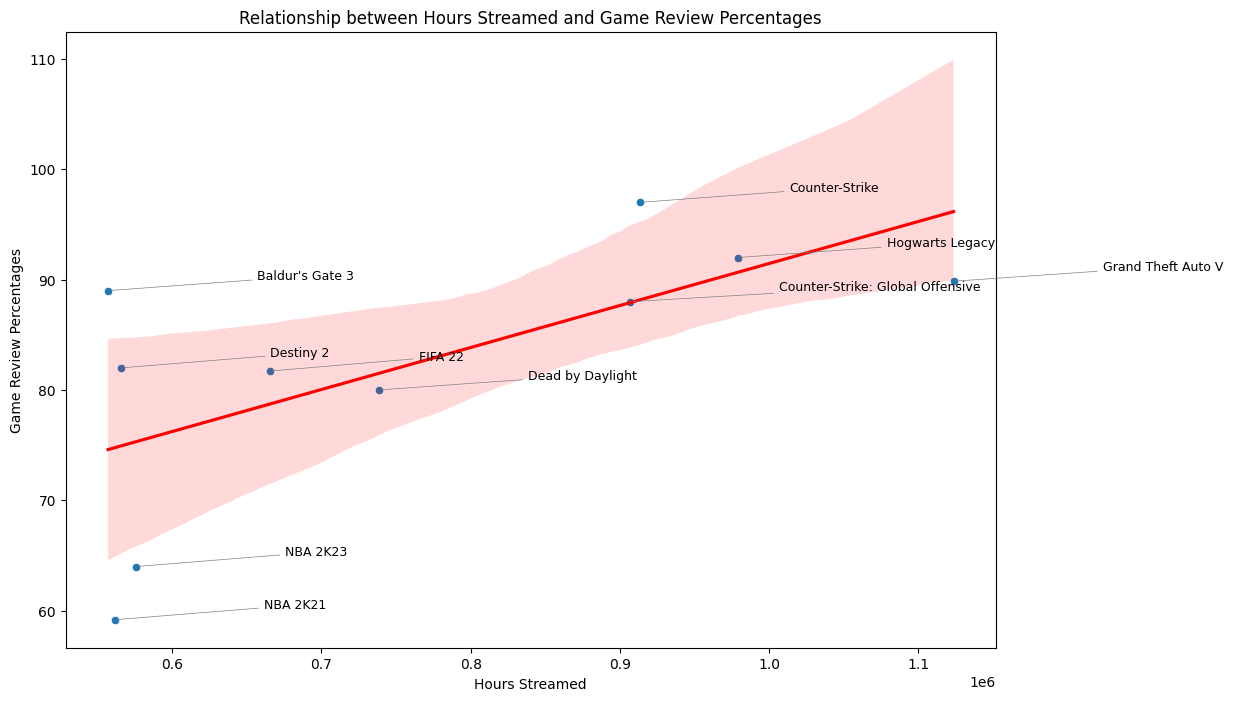

In [17]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_hours_streamed', y='review_avg_percent', data=top_10_streamed_df)
sns.regplot(x='avg_hours_streamed', y='review_avg_percent', data=top_10_streamed_df, scatter=False, color='red')  # Adds a trend line

# Annotate each point with a line and the title
for i in range(top_10_streamed_df.shape[0]):
    # Get the x and y values
    x = top_10_streamed_df['avg_hours_streamed'].iloc[i]
    y = top_10_streamed_df['review_avg_percent'].iloc[i]
    
    # Annotate with a line and text
    plt.annotate(
        top_10_streamed_df['title'].iloc[i], 
        xy=(x, y), 
        xytext=(x + 1e5, y + 1),  # Offset the text position
        fontsize=9,
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),  # Draw a line from the point to the text
        ha='left'
    )

plt.title('Relationship between Hours Streamed and Game Review Percentages')
plt.xlabel('Hours Streamed')
plt.ylabel('Game Review Percentages')
plt.show()

In [18]:
# Read 'Hunt-LB_gte4_tags_shared.csv'
four_tags_shared_df = pd.read_csv('Resources/Hunt-LB_gte4_tags_shared.csv')
four_tags_shared_df.head()

,index,app_id,title,avg_hours_streamed,reviews_total,review_avg_percent,avg_hours_watched,avg_streamers,avg_viewers,avg_channels,release_date,launch_price_cents,dataset_est_rev_cents
0,127,10,Counter-Strike,913781,137421,97.0,53172684,141632,72571,1248,2000-11-01,999,137283579
1,128,730,Counter-Strike: Global Offensive,906847,7382695,88.0,48489362,123006,66604,1243,2012-08-21,1499,11066659805
2,174,1085660,Destiny 2,565819,555551,82.0,7174193,53869,9832,775,2019-10-01,3499,1943872949
3,517,578080,PUBG: BATTLEGROUNDS,495358,2201296,57.0,9725767,47808,13337,679,2017-12-21,2999,6601686704
4,569,1174180,Red Dead Redemption 2,236684,394937,90.0,3104279,30149,4253,324,2019-12-05,5999,2369227063


In [19]:
# Read 'Hunt-LB_gte5_tags_shared.csv'
five_tags_shared_df = pd.read_csv('Resources/Hunt-LB_gte5_tags_shared.csv')
five_tags_shared_df.head()

,index,app_id,title,avg_hours_streamed,reviews_total,review_avg_percent,avg_hours_watched,avg_streamers,avg_viewers,avg_channels,release_date,launch_price_cents,dataset_est_rev_cents
0,128,730,Counter-Strike: Global Offensive,906847,7382695,88.0,48489362,123006,66604,1243,2012-08-21,1499,11066659805
1,517,578080,PUBG: BATTLEGROUNDS,495358,2201296,57.0,9725767,47808,13337,679,2017-12-21,2999,6601686704
2,352,594650,Hunt: Showdown,117086,133530,83.0,2149006,10008,2959,160,2019-08-27,3999,533986470
3,146,782330,DOOM Eternal,105214,151201,91.0,2281359,15405,3086,142,2020-03-19,5999,907054799
4,391,232090,Killing Floor 2,42500,74868,89.0,216266,13175,297,58,2016-11-18,2999,224529132


In [20]:
# Create a copy of df 
five_tags_shared_df_copy = five_tags_shared_df.copy()

# Drop 'Counter-Strike: Global Offensive' and 'PUBG: BATTLEGROUNDS'
five_tags_shared_df_copy = five_tags_shared_df_copy[~five_tags_shared_df['title'].isin(['Counter-Strike: Global Offensive', 'PUBG: BATTLEGROUNDS'])]
five_tags_shared_df_copy

,index,app_id,title,avg_hours_streamed,reviews_total,review_avg_percent,avg_hours_watched,avg_streamers,avg_viewers,avg_channels,release_date,launch_price_cents,dataset_est_rev_cents
2,352,594650,Hunt: Showdown,117086,133530,83.0,2149006,10008,2959,160,2019-08-27,3999,533986470
3,146,782330,DOOM Eternal,105214,151201,91.0,2281359,15405,3086,142,2020-03-19,5999,907054799
4,391,232090,Killing Floor 2,42500,74868,89.0,216266,13175,297,58,2016-11-18,2999,224529132
5,143,379720,DOOM,35232,120073,95.0,620890,9235,842,47,2016-05-12,5999,720317927
6,369,581320,Insurgency: Sandstorm,27906,85036,86.0,612790,6363,824,37,2018-12-12,2999,255022964
7,277,493520,GTFO,23939,34952,87.0,851431,5277,1155,32,2021-12-09,3999,139773048
8,612,257420,Serious Sam 4,12029,11809,83.0,580536,2061,807,16,2020-09-24,3999,47224191
9,322,657200,Hand Simulator,4209,28054,84.0,394697,2341,535,5,2017-07-18,199,5582746


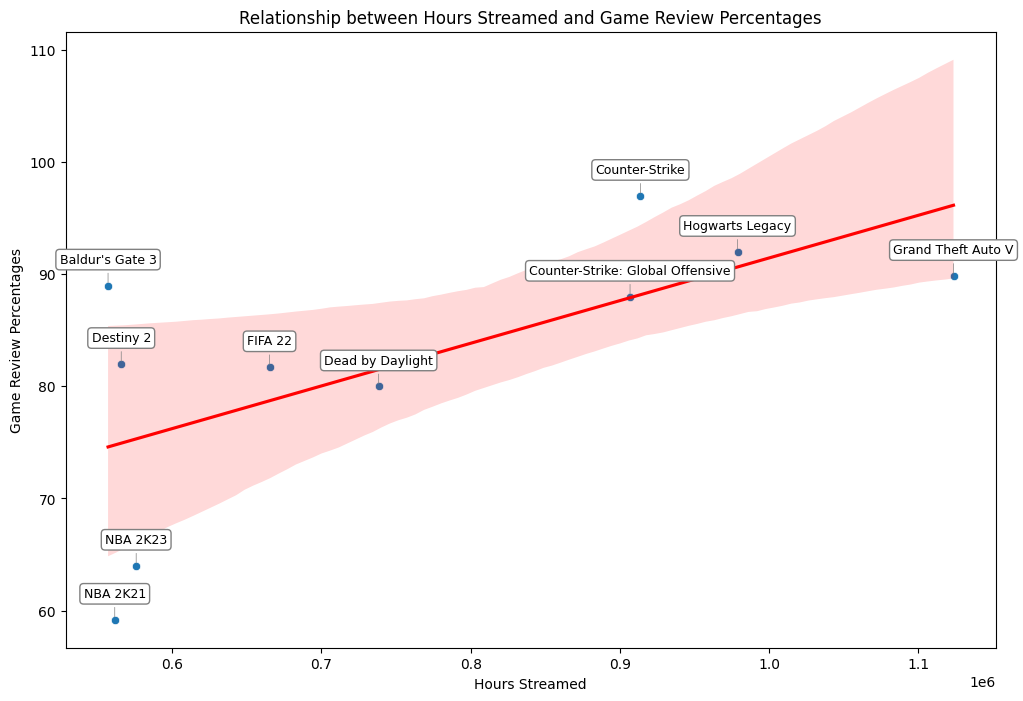

In [21]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_hours_streamed', y='review_avg_percent', data=top_10_streamed_df)
sns.regplot(x='avg_hours_streamed', y='review_avg_percent', data=top_10_streamed_df, scatter=False, color='red')  # Adds a trend line

# Annotate each point with the title right above the dot
for i in range(top_10_streamed_df.shape[0]):
    x = top_10_streamed_df['avg_hours_streamed'].iloc[i]
    y = top_10_streamed_df['review_avg_percent'].iloc[i]
    
    # Annotate with a line and text right above the point
    plt.annotate(
        top_10_streamed_df['title'].iloc[i],
        xy=(x, y), 
        xytext=(x, y + 2),  # Offset text position slightly above the dot
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'),  # Add a background box
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),  # Draw a line from the point to the text
        ha='center'  # Center align text horizontally
    )

plt.title('Relationship between Hours Streamed and Game Review Percentages')
plt.xlabel('Hours Streamed')
plt.ylabel('Game Review Percentages')

# plt.ylim(0, 100)  # Limit Y-axis to 100

plt.show()

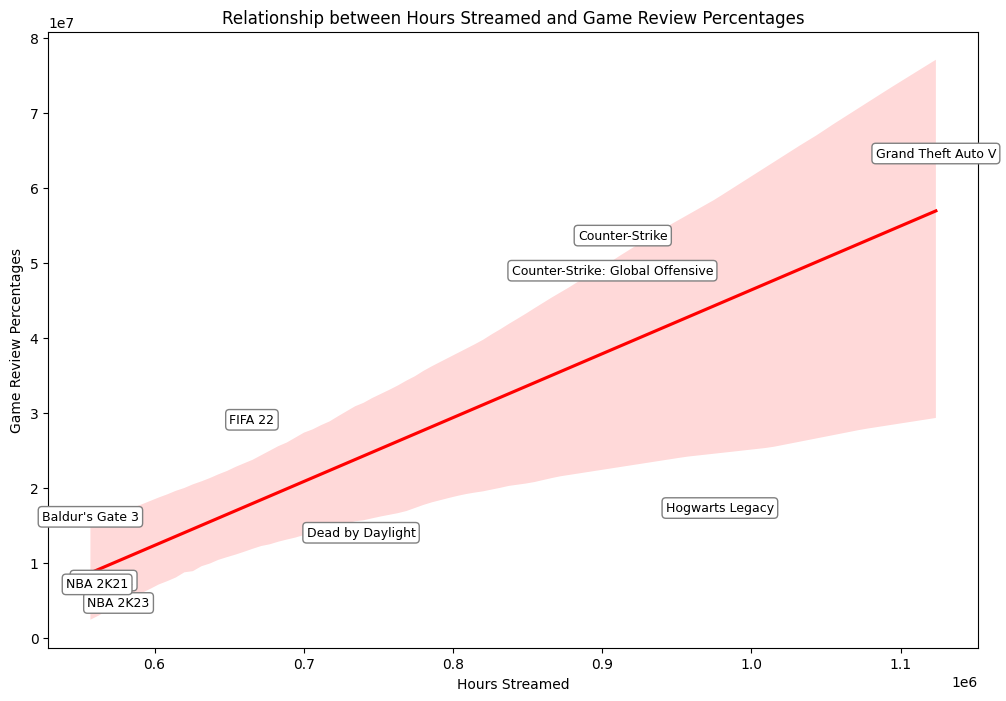

In [22]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_hours_streamed', y='avg_hours_watched', data=top_10_streamed_df)
sns.regplot(x='avg_hours_streamed', y='avg_hours_watched', data=top_10_streamed_df, scatter=False, color='red')  # Adds a trend line

# Annotate each point with the title right above the dot
for i in range(top_10_streamed_df.shape[0]):
    x = top_10_streamed_df['avg_hours_streamed'].iloc[i]
    y = top_10_streamed_df['avg_hours_watched'].iloc[i]
    
    # Annotate with a line and text right above the point
    plt.annotate(
        top_10_streamed_df['title'].iloc[i],
        xy=(x, y), 
        xytext=(x, y + 2),  # Offset text position slightly above the dot
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'),  # Add a background box
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),  # Draw a line from the point to the text
        ha='center'  # Center align text horizontally
    )

plt.title('Relationship between Hours Streamed and Game Review Percentages')
plt.xlabel('Hours Streamed')
plt.ylabel('Game Review Percentages')

# plt.ylim(0, 100)  # Limit Y-axis to 100

plt.show()

In [23]:
top_10_4tags_df = four_tags_shared_df.nlargest(10, 'avg_hours_streamed')
top_10_4tags_df.head(10)

,index,app_id,title,avg_hours_streamed,reviews_total,review_avg_percent,avg_hours_watched,avg_streamers,avg_viewers,avg_channels,release_date,launch_price_cents,dataset_est_rev_cents
0,127,10,Counter-Strike,913781,137421,97.0,53172684,141632,72571,1248,2000-11-01,999,137283579
1,128,730,Counter-Strike: Global Offensive,906847,7382695,88.0,48489362,123006,66604,1243,2012-08-21,1499,11066659805
2,174,1085660,Destiny 2,565819,555551,82.0,7174193,53869,9832,775,2019-10-01,3499,1943872949
3,517,578080,PUBG: BATTLEGROUNDS,495358,2201296,57.0,9725767,47808,13337,679,2017-12-21,2999,6601686704
4,569,1174180,Red Dead Redemption 2,236684,394937,90.0,3104279,30149,4253,324,2019-12-05,5999,2369227063
5,57,924970,Back 4 Blood,232005,36130,66.0,6077030,38193,8202,313,2021-10-12,5999,216743870
6,754,1286680,Tiny Tina's Wonderlands,201391,9094,76.0,3259927,30371,4441,275,2022-06-23,7999,72742906
7,597,252490,Rust,183374,775223,87.0,10434473,18355,14292,251,2018-02-08,3999,3100116777
8,64,671860,BattleBit Remastered,146138,63529,90.0,6292272,27123,8577,198,2023-06-15,1499,95229971
9,570,1294810,Redfall,141609,1763,31.0,2850843,34278,3836,190,2023-05-01,6999,12339237


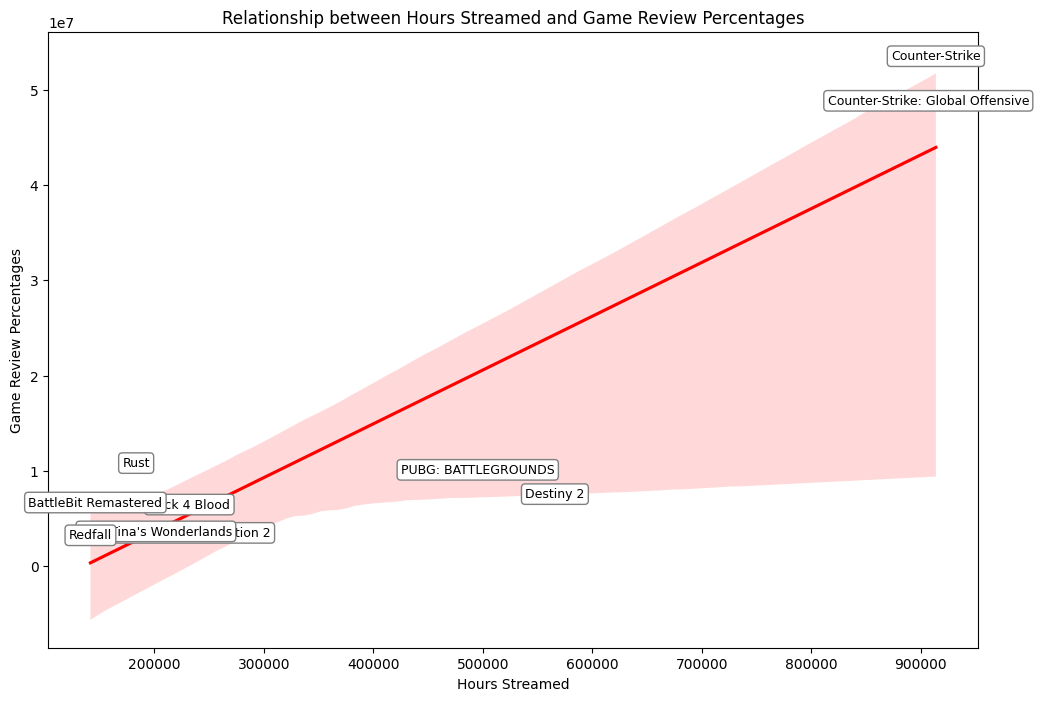

In [24]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.scatterplot(x='avg_hours_streamed', y='avg_hours_watched', data=top_10_4tags_df)
sns.regplot(x='avg_hours_streamed', y='avg_hours_watched', data=top_10_4tags_df, scatter=False, color='red')  # Adds a trend line

# Annotate each point with the title right above the dot
for i in range(top_10_4tags_df.shape[0]):
    x = top_10_4tags_df['avg_hours_streamed'].iloc[i]
    y = top_10_4tags_df['avg_hours_watched'].iloc[i]
    
    # Annotate with a line and text right above the point
    plt.annotate(
        top_10_4tags_df['title'].iloc[i],
        xy=(x, y), 
        xytext=(x, y + 2),  # Offset text position slightly above the dot
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'),  # Add a background box
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),  # Draw a line from the point to the text
        ha='center'  # Center align text horizontally
    )

plt.title('Relationship between Hours Streamed and Game Review Percentages')
plt.xlabel('Hours Streamed')
plt.ylabel('Game Review Percentages')

# plt.ylim(0, 100)  # Limit Y-axis to 100

plt.show()